In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('lat-lon-IMDAA.csv')
df.head(2)

,time,latitude,longitude,TMP_2m,PRES_sfc,MTERH_sfc,HPBL_sfc,UGRD_10m,VGRD_10m,DSWRF_sfc,DLWRF_sfc,Windspeed,Winddir,APCP_sfc
0,01/07/2019 00:00,15.599999,72.48,301.75397,100393.375,0.359467,521.478,9.378754,0.352875,2.0,424.45285,9.385390,2.154732,0.06250
1,01/07/2019 00:00,15.599999,72.60,301.76960,100393.375,0.359467,539.478,9.378754,0.477875,2.0,424.70285,9.390921,2.916864,0.09375


In [4]:
df.index = pd.to_datetime(df['time'], format='%d/%m/%Y %H:%M')
#df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head(2)

,time,latitude,longitude,TMP_2m,PRES_sfc,MTERH_sfc,HPBL_sfc,UGRD_10m,VGRD_10m,DSWRF_sfc,DLWRF_sfc,Windspeed,Winddir,APCP_sfc
time,,,,,,,,,,,,,,
2019-07-01,01/07/2019 00:00,15.599999,72.48,301.75397,100393.375,0.359467,521.478,9.378754,0.352875,2.0,424.45285,9.385390,2.154732,0.06250
2019-07-01,01/07/2019 00:00,15.599999,72.60,301.76960,100393.375,0.359467,539.478,9.378754,0.477875,2.0,424.70285,9.390921,2.916864,0.09375


In [26]:
df['time'] = df['time'].astype('datetime64[ns]')
df.dtypes

time         datetime64[ns]
latitude            float64
longitude           float64
TMP_2m              float64
PRES_sfc            float64
MTERH_sfc           float64
HPBL_sfc            float64
UGRD_10m            float64
VGRD_10m            float64
DSWRF_sfc           float64
DLWRF_sfc           float64
Windspeed           float64
Winddir             float64
APCP_sfc            float64
dtype: object

<AxesSubplot:xlabel='time'>

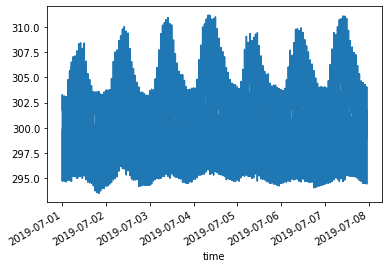

In [6]:
temp = df['TMP_2m']
temp.plot()

In [10]:
df.corr()['TMP_2m']

latitude    -0.220560
longitude    0.217274
TMP_2m       1.000000
PRES_sfc     0.551978
MTERH_sfc   -0.563116
HPBL_sfc     0.325927
UGRD_10m     0.310732
VGRD_10m    -0.013956
DSWRF_sfc    0.419302
DLWRF_sfc    0.591772
Windspeed    0.326990
Winddir     -0.132576
APCP_sfc    -0.073374
Name: TMP_2m, dtype: float64

In [11]:
df.corr()['APCP_sfc']

latitude     0.093644
longitude   -0.053154
TMP_2m      -0.073374
PRES_sfc     0.055188
MTERH_sfc   -0.060306
HPBL_sfc    -0.093552
UGRD_10m    -0.086932
VGRD_10m     0.024862
DSWRF_sfc    0.059720
DLWRF_sfc    0.095995
Windspeed   -0.070655
Winddir      0.070740
APCP_sfc     1.000000
Name: APCP_sfc, dtype: float64

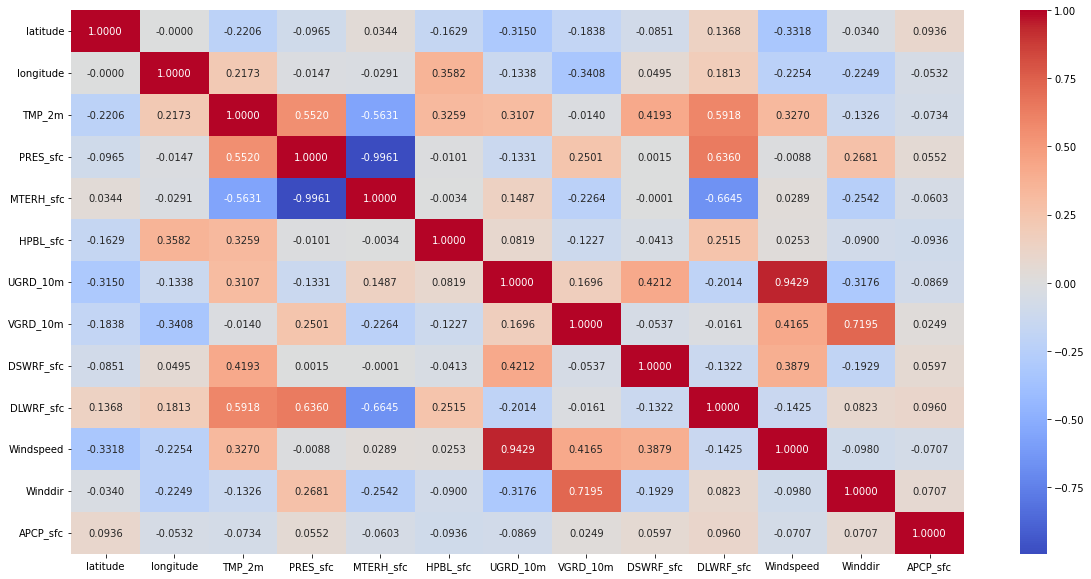

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=True, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result1.png', bbox_inches='tight', pad_inches=1)

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df.head()

,time,latitude,longitude,TMP_2m,PRES_sfc,MTERH_sfc,HPBL_sfc,UGRD_10m,VGRD_10m,DSWRF_sfc,DLWRF_sfc,Windspeed,Winddir,APCP_sfc
time,,,,,,,,,,,,,,
2019-07-01,01/07/2019 00:00,15.599999,72.48,301.75397,100393.375,0.359467,521.47800,9.378754,0.352875,2.00,424.45285,9.385390,2.154732,0.06250
2019-07-01,01/07/2019 00:00,15.599999,72.60,301.76960,100393.375,0.359467,539.47800,9.378754,0.477875,2.00,424.70285,9.390921,2.916864,0.09375
2019-07-01,01/07/2019 00:00,15.599999,72.72,301.78522,100393.375,0.359467,517.47800,9.238129,0.384125,2.25,423.95285,9.246112,2.381008,0.15625
2019-07-01,01/07/2019 00:00,15.599999,72.84,301.76960,100409.375,0.359467,477.47806,9.097504,0.384125,2.25,426.70285,9.105610,2.417769,0.21875
2019-07-01,01/07/2019 00:00,15.599999,72.96,301.75397,100409.375,0.359467,449.47806,8.863129,0.384125,2.50,425.57785,8.871449,2.481625,0.28125


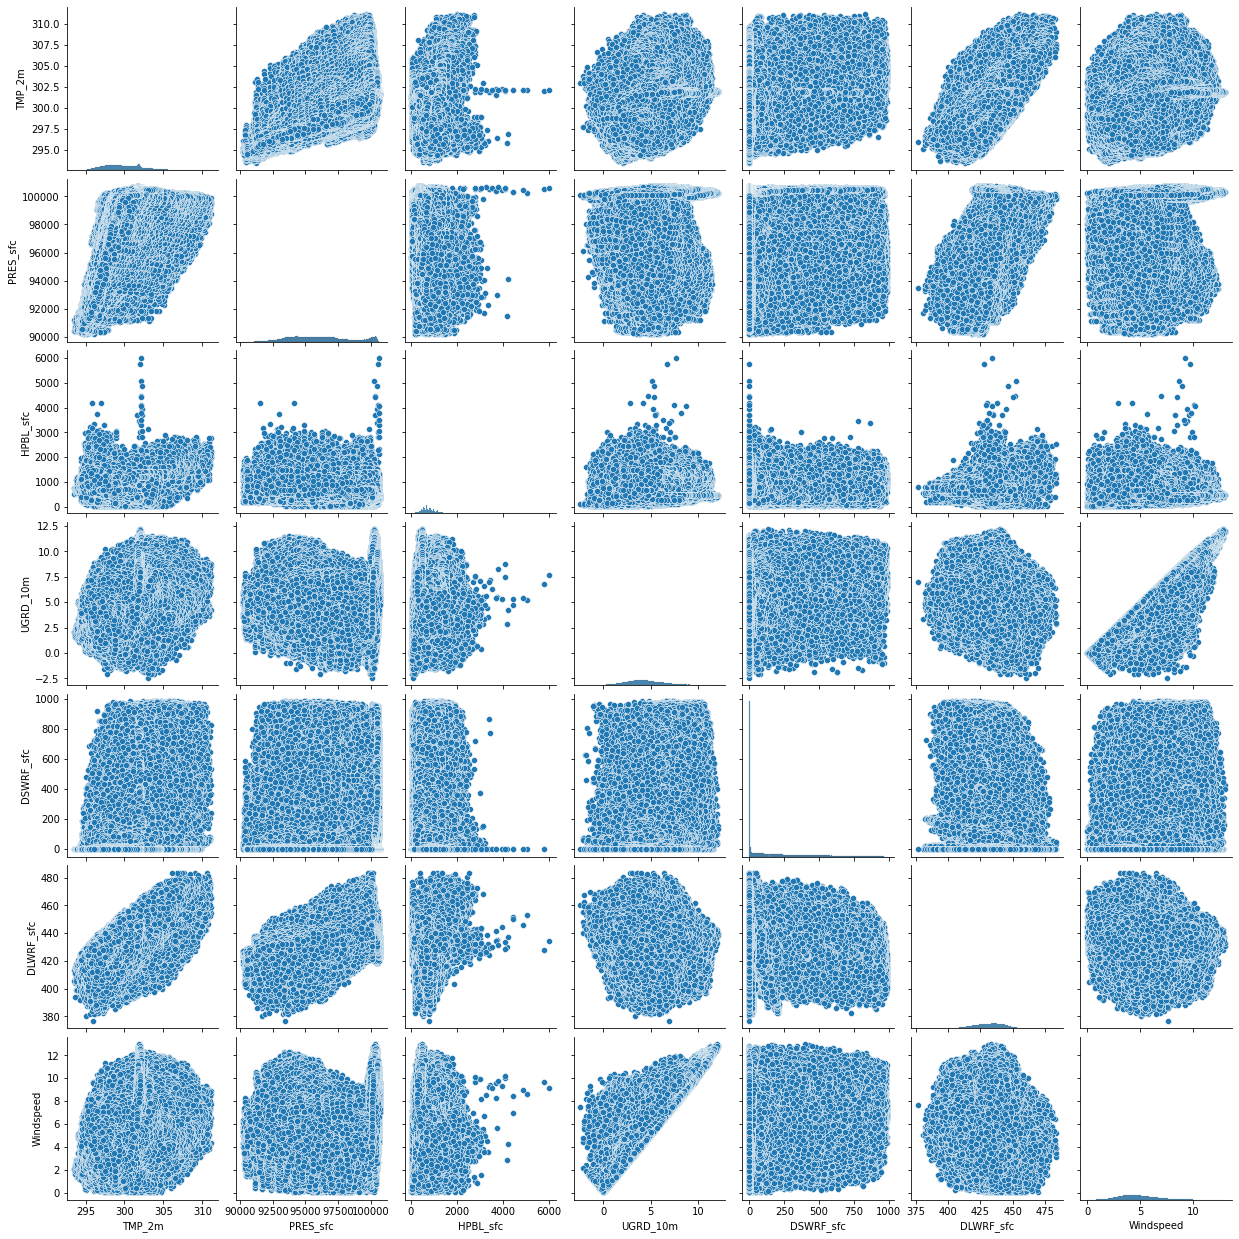

In [7]:
df1 = df[['TMP_2m','PRES_sfc','HPBL_sfc','UGRD_10m','DSWRF_sfc','DLWRF_sfc','Windspeed']]

sns.pairplot(df1, kind="scatter")
plt.show()

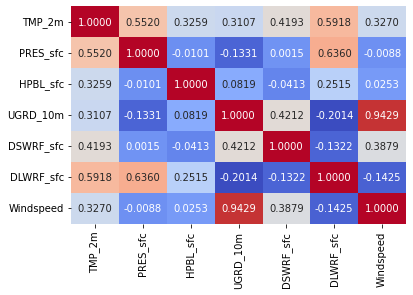

In [15]:
fig, ax = plt.subplots()
sns.heatmap(df1.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

In [6]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((1048570, 5, 1), (1048570,))

In [8]:
x_train, y_train = X1[:800000], y1[:800000]
x_val, y_val = X1[800000:900000] ,y1[800000:900000]
x_test, y_test = X1[900000:] ,y1[900000:]
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((800000, 5, 1),
 (800000,),
 (100000, 5, 1),
 (100000,),
 (148570, 5, 1),
 (148570,))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [10]:
cp = ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss=mean_squared_error, optimizer= Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()] )

In [11]:
model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
24988/25000 [============================>.] - ETA: 0s - loss: 2195.1665 - root_mean_squared_error: 46.8526

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


25000/25000 [==============================] - 100s 4ms/step - loss: 2194.1128 - root_mean_squared_error: 46.8414 - val_loss: 0.5236 - val_root_mean_squared_error: 0.7236
Epoch 2/10
25000/25000 [==============================] - 93s 4ms/step - loss: 0.7914 - root_mean_squared_error: 0.8896 - val_loss: 0.5679 - val_root_mean_squared_error: 0.7536
Epoch 3/10
25000/25000 [==============================] - 88s 4ms/step - loss: 0.7279 - root_mean_squared_error: 0.8532 - val_loss: 1.1848 - val_root_mean_squared_error: 1.0885
Epoch 4/10
25000/25000 [==============================] - 87s 3ms/step - loss: 0.6992 - root_mean_squared_error: 0.8362 - val_loss: 0.6061 - val_root_mean_squared_error: 0.7785
Epoch 5/10
24996/25000 [============================>.] - ETA: 0s - loss: 0.6868 - root_mean_squared_error: 0.8287

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


25000/25000 [==============================] - 98s 4ms/step - loss: 0.6868 - root_mean_squared_error: 0.8287 - val_loss: 0.4352 - val_root_mean_squared_error: 0.6597
Epoch 6/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.6678 - root_mean_squared_error: 0.8172 - val_loss: 0.7255 - val_root_mean_squared_error: 0.8517
Epoch 7/10
25000/25000 [==============================] - 98s 4ms/step - loss: 0.6561 - root_mean_squared_error: 0.8100 - val_loss: 1.0136 - val_root_mean_squared_error: 1.0068
Epoch 8/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.6467 - root_mean_squared_error: 0.8042 - val_loss: 0.7269 - val_root_mean_squared_error: 0.8526
Epoch 9/10
25000/25000 [==============================] - 100s 4ms/step - loss: 0.6410 - root_mean_squared_error: 0.8007 - val_loss: 0.4735 - val_root_mean_squared_error: 0.6881
Epoch 10/10
25000/25000 [==============================] - 87s 3ms/step - loss: 0.6309 - root_mean_squared_error: 0.7943 - va

In [12]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [13]:
train_prediction = model1.predict(x_train).flatten()
train_result = pd.DataFrame(data={'Train prediction':train_prediction, 'Actual':y_train})
train_result

,Train prediction,Actual
0,300.891296,300.89550
1,300.947784,300.95593
2,301.004700,301.01340
3,301.057892,301.06420
4,301.103394,301.11243
...,...,...
799995,308.163055,308.00293
799996,307.861481,307.67618
799997,307.517334,307.24155
799998,307.043793,306.77582


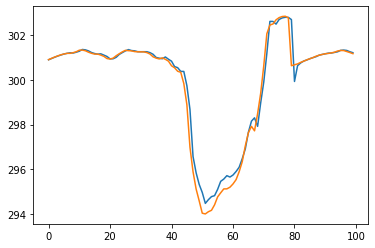

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_result['Train prediction'][:100])
plt.plot(train_result['Actual'][:100])

In [15]:
val_predictions = model1.predict(x_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,305.527222,306.13538
1,306.113281,307.03506
2,307.213806,308.58405
3,308.952087,309.28284
4,309.399200,309.32895
...,...,...
99995,300.569580,300.62700
99996,300.778168,300.88968
99997,301.026428,300.98170
99998,301.050507,301.10630


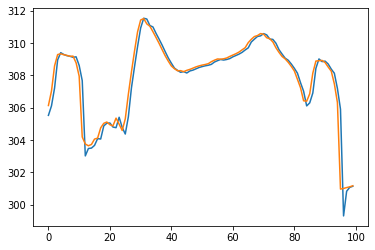

In [16]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [17]:
test_predictions = model1.predict(x_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,301.189911,301.11075
1,301.113251,301.11655
2,301.132080,300.94696
3,300.909546,300.65480
4,300.581635,300.30484
...,...,...
148565,297.186462,297.00470
148566,297.343597,297.30840
148567,297.726624,301.39102
148568,302.996399,301.45120


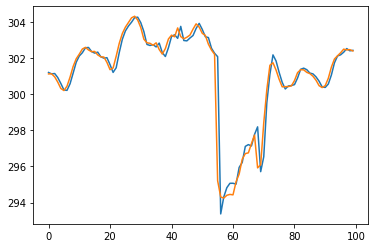

In [18]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

# part2

In [19]:
from sklearn.metrics import mean_squared_error as mse
def plot_predctions1(model, X, y, start=0, end=100):
    predctions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predctions':predctions,'Actuals':y})
    plt.plot(df['Predctions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df,mse(y, predctions)

(        Predctions    Actuals
 0       301.189911  301.11075
 1       301.113251  301.11655
 2       301.132080  300.94696
 3       300.909546  300.65480
 4       300.581635  300.30484
 ...            ...        ...
 148565  297.186462  297.00470
 148566  297.343597  297.30840
 148567  297.726624  301.39102
 148568  302.996399  301.45120
 148569  301.624390  301.52063
 
 [148570 rows x 2 columns],
 0.4041997077728407)

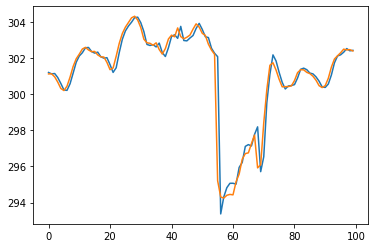

In [20]:
plot_predctions1(model1,x_test,y_test)

In [21]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8,'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [22]:
cp2 = ModelCheckpoint('model2/',save_best_only=True)
model2.compile(loss=mean_squared_error, optimizer= Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()] )

In [23]:
model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
24973/25000 [============================>.] - ETA: 0s - loss: 18.8854 - root_mean_squared_error: 4.3457INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


25000/25000 [==============================] - 40s 2ms/step - loss: 18.8660 - root_mean_squared_error: 4.3435 - val_loss: 0.6556 - val_root_mean_squared_error: 0.8097
Epoch 2/10
24978/25000 [============================>.] - ETA: 0s - loss: 0.8790 - root_mean_squared_error: 0.9376INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


25000/25000 [==============================] - 38s 2ms/step - loss: 0.8792 - root_mean_squared_error: 0.9377 - val_loss: 0.4652 - val_root_mean_squared_error: 0.6821
Epoch 3/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.9098 - root_mean_squared_error: 0.9538 - val_loss: 0.6346 - val_root_mean_squared_error: 0.7966
Epoch 4/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.7645 - root_mean_squared_error: 0.8744 - val_loss: 0.5499 - val_root_mean_squared_error: 0.7416
Epoch 5/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.7381 - root_mean_squared_error: 0.8591 - val_loss: 1.0718 - val_root_mean_squared_error: 1.0353
Epoch 6/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.7146 - root_mean_squared_error: 0.8453 - val_loss: 1.4295 - val_root_mean_squared_error: 1.1956
Epoch 7/10
24969/25000 [============================>.] - ETA: 0s - loss: 0.6940 - root_mean_squared_error: 0.8331INFO:tensorf

INFO:tensorflow:Assets written to: model2/assets


25000/25000 [==============================] - 39s 2ms/step - loss: 0.6944 - root_mean_squared_error: 0.8333 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6719
Epoch 8/10
24999/25000 [============================>.] - ETA: 0s - loss: 0.6739 - root_mean_squared_error: 0.8209INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


25000/25000 [==============================] - 40s 2ms/step - loss: 0.6739 - root_mean_squared_error: 0.8209 - val_loss: 0.4372 - val_root_mean_squared_error: 0.6612
Epoch 9/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.6658 - root_mean_squared_error: 0.8159 - val_loss: 0.6627 - val_root_mean_squared_error: 0.8140
Epoch 10/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.6556 - root_mean_squared_error: 0.8097 - val_loss: 0.8365 - val_root_mean_squared_error: 0.9146


In [24]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8,'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [25]:
cp3 = ModelCheckpoint('model3/',save_best_only=True)
model3.compile(loss=mean_squared_error, optimizer= Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()] )

In [26]:
model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
24990/25000 [============================>.] - ETA: 0s - loss: 2015.2456 - root_mean_squared_error: 44.8915

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


25000/25000 [==============================] - 81s 3ms/step - loss: 2014.4471 - root_mean_squared_error: 44.8826 - val_loss: 15.4242 - val_root_mean_squared_error: 3.9274
Epoch 2/10
24993/25000 [============================>.] - ETA: 0s - loss: 17.8738 - root_mean_squared_error: 4.2277

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


25000/25000 [==============================] - 79s 3ms/step - loss: 17.8740 - root_mean_squared_error: 4.2278 - val_loss: 15.2242 - val_root_mean_squared_error: 3.9018
Epoch 3/10
25000/25000 [==============================] - 72s 3ms/step - loss: 17.8790 - root_mean_squared_error: 4.2284 - val_loss: 15.2291 - val_root_mean_squared_error: 3.9024
Epoch 4/10
25000/25000 [==============================] - 72s 3ms/step - loss: 17.8747 - root_mean_squared_error: 4.2278 - val_loss: 15.3325 - val_root_mean_squared_error: 3.9157
Epoch 5/10
25000/25000 [==============================] - 72s 3ms/step - loss: 17.8770 - root_mean_squared_error: 4.2281 - val_loss: 15.2283 - val_root_mean_squared_error: 3.9023
Epoch 6/10
25000/25000 [==============================] - 72s 3ms/step - loss: 17.8674 - root_mean_squared_error: 4.2270 - val_loss: 15.2898 - val_root_mean_squared_error: 3.9102
Epoch 7/10
25000/25000 [==============================] - 71s 3ms/step - loss: 17.8781 - root_mean_squared_error: 4.

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


25000/25000 [==============================] - 79s 3ms/step - loss: 17.8785 - root_mean_squared_error: 4.2283 - val_loss: 15.2234 - val_root_mean_squared_error: 3.9017
Epoch 9/10
25000/25000 [==============================] - 71s 3ms/step - loss: 17.8757 - root_mean_squared_error: 4.2280 - val_loss: 15.2652 - val_root_mean_squared_error: 3.9071
Epoch 10/10
25000/25000 [==============================] - 71s 3ms/step - loss: 17.8732 - root_mean_squared_error: 4.2277 - val_loss: 15.6486 - val_root_mean_squared_error: 3.9558
